In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import math
from PIL import Image

In [ ]:
!wget https://www.telegraph.co.uk/multimedia/archive/03397/Close_up_daisy_Ala_3397447d.jpg?imwidth=1280
!wget https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/hubble_saturnspokes_stsci-01gph6dah7k11cg5pcvq4b9fq5.png?itok=ykfWBA-H
os.rename("/content/Close_up_daisy_Ala_3397447d.jpg?imwidth=1280", "/content/Daisy.jpg")
os.rename("/content/hubble_saturnspokes_stsci-01gph6dah7k11cg5pcvq4b9fq5.png?itok=ykfWBA-H", "/content/Saturn.jpg")

--2023-09-19 13:18:25--  https://www.telegraph.co.uk/multimedia/archive/03397/Close_up_daisy_Ala_3397447d.jpg?imwidth=1280
Resolving www.telegraph.co.uk (www.telegraph.co.uk)... 184.85.110.120
Connecting to www.telegraph.co.uk (www.telegraph.co.uk)|184.85.110.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37268 (36K) [image/jpeg]
Saving to: ‘Close_up_daisy_Ala_3397447d.jpg?imwidth=1280’

Close_up_daisy_Ala_ 100%[===================>]  36.39K  --.-KB/s    in 0.004s  

2023-09-19 13:18:27 (9.85 MB/s) - ‘Close_up_daisy_Ala_3397447d.jpg?imwidth=1280’ saved [37268/37268]

--2023-09-19 13:18:27--  https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/hubble_saturnspokes_stsci-01gph6dah7k11cg5pcvq4b9fq5.png?itok=ykfWBA-H
Resolving www.nasa.gov (www.nasa.gov)... 13.35.7.53, 13.35.7.127, 13.35.7.113, ...
Connecting to www.nasa.gov (www.nasa.gov)|13.35.7.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386179

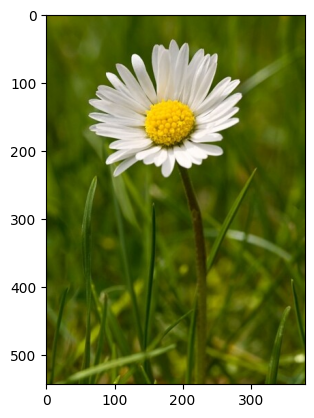

In [ ]:
daisy = "/content/Daisy.jpg"
img_daisy = cv2.imread(daisy)
img_daisy = cv2.cvtColor(img_daisy, cv2.COLOR_BGR2RGB)
plt.imshow(img_daisy)
plt.show()

In [ ]:
print(img_daisy.shape)

(543, 380, 3)


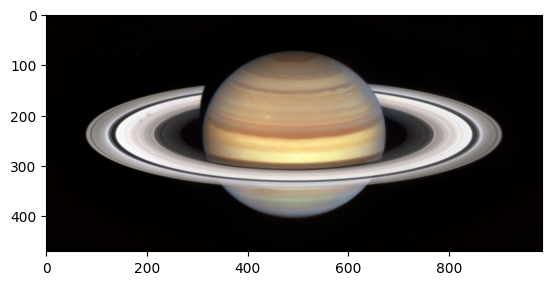

In [ ]:
saturn = "/content/Saturn.jpg"
img_saturn = cv2.imread(saturn)
img_saturn = cv2.cvtColor(img_saturn, cv2.COLOR_BGR2RGB)
plt.imshow(img_saturn)
plt.show()

## Rotating Method - 1

In [ ]:
def rotate_image_1(image, angle):
  rotated_image = np.zeros(image.shape).astype('uint8')
  midx = image.shape[1]//2
  midy = image.shape[0]//2
  theta = np.radians(angle)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      i_ = i - midx
      j_ = j - midy
      x = round((i_*np.cos(theta) + j_*np.sin(theta))) + midx
      y = round((-i_*np.sin(theta) + j_*np.cos(theta))) + midy
      if(x >= 0 and y >= 0 and x < image.shape[0] and y < image.shape[1]):
        rotated_image[x][y] = image[i][j]
  return rotated_image

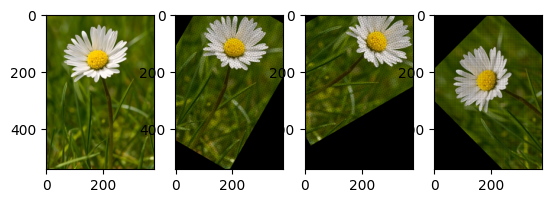

In [ ]:
img = cv2.imread("/content/Daisy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Rotating image clockwise
rotated_image_1 = rotate_image_1(img, 30)
rotated_image_2 = rotate_image_1(img, 60)
rotated_image_3 = rotate_image_1(img, -45)
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(rotated_image_1)
plt.subplot(1, 4, 3)
plt.imshow(rotated_image_2)
plt.subplot(1, 4, 4)
plt.imshow(rotated_image_3)
plt.show()

## Rotating Method - 2 (Just changing the aspect ratio)

In [ ]:
def rotate_image_2(image, angle):
  theta = np.radians(angle)
  height_rotated_image = round(abs(image.shape[0]*np.cos(theta))) + round(abs(image.shape[1]*np.sin(theta)))
  width_rotated_image = round(abs(-image.shape[0]*np.sin(theta))) + round(abs(image.shape[1]*np.cos(theta)))
  # Trying different rotated image sizings, the below one is diagonal length of the image
  # height_rotated_image = round(np.sqrt((image.shape[0])**2 + image.shape[1]**2))
  # width_rotated_image = round(np.sqrt((image.shape[0])**2 + image.shape[1]**2))
  rotated_image = np.zeros((height_rotated_image, width_rotated_image, image.shape[2])).astype('uint8')
  midx = image.shape[1]//2
  midy = image.shape[0]//2
  midx_ = rotated_image.shape[1]//2
  midy_ = rotated_image.shape[0]//2
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      i_ = i - midx
      j_ = j - midy
      x = round((i_*np.cos(theta) + j_*np.sin(theta))) + midx_
      y = round((-i_*np.sin(theta) + j_*np.cos(theta))) + midy_
      # print(type(i_), type(j_), type(midx), type(midy), type(midx_), type(midy_))
      if(x >= 0 and y >= 0 and x < image.shape[0] and y < image.shape[1]):
        rotated_image[x][y] = image[i][j]
  return rotated_image

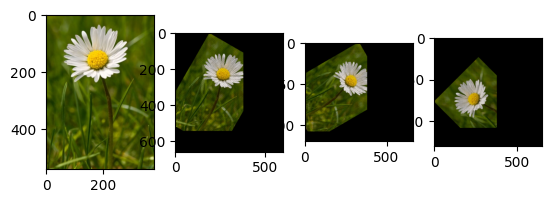

In [ ]:
img = cv2.imread("/content/Daisy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Rotating image clockwise
rotated_image_1 = rotate_image_2(img, 30)
rotated_image_2 = rotate_image_2(img, 60)
rotated_image_3 = rotate_image_2(img, -45)
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(rotated_image_1)
plt.subplot(1, 4, 3)
plt.imshow(rotated_image_2)
plt.subplot(1, 4, 4)
plt.imshow(rotated_image_3)
plt.show()

## Using Built-In library

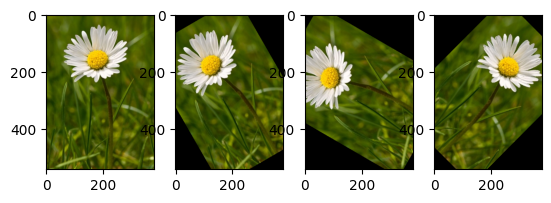

In [ ]:
img = Image.open("/content/Daisy.jpg")
# Rotating image counter clockwise
rotated_image_1 = img.rotate(30)
rotated_image_2 = img.rotate(60)
rotated_image_3 = img.rotate(-45)
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(rotated_image_1)
plt.subplot(1, 4, 3)
plt.imshow(rotated_image_2)
plt.subplot(1, 4, 4)
plt.imshow(rotated_image_3)
plt.show()

## Analysis

- **Rotation Methods Used**
  - First method: Shifting the origin and transforming the image into a rotated state.
  - Second method: Utilizing diagonals of the original image to compute the height and width of the rotated image.

- **Objective: Fitting Rotated Image**
  - The primary goal is to seamlessly fit the rotated image into the result without clipping any parts.

- **Approach for Fitting**
  - Using the longest width of the diagonal as an upper bound for the height and width of the rotated image.

- **Observations on First Method**
  - Images are rotated correctly at the specified angle.
  - Some images lack alignment with the origin and are oriented differently, resulting in improper centering.

- **Observations on Second Method**
  - Utilizes diagonals of the original image to compute dimensions.
  - Ensures that the rotated image fits into the result without clipping.

- **Discrepancies**
  - Issues related to origin alignment and proper centering are noted in the first method.

- **Comparison with Builtin Library**
  - No observed issues in the Builtin library for image rotation.
  - Builtin library rotation provides consistent and accurate results.

These insights highlight the strengths and limitations of the two methods employed for image rotation and emphasize the seamless performance of the Builtin library in comparison.

## Task 2

In [ ]:
def transform(dx, dy, sx, sy):
  return np.array([[sx, 0, dx],
   [0, sy, dy],
   [0, 0, 1]])

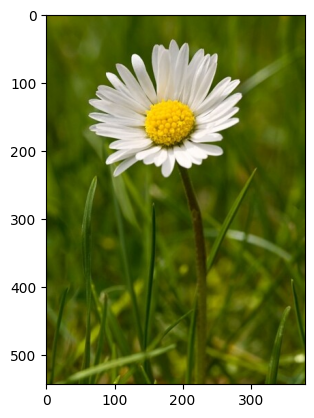

In [ ]:
img = cv2.imread("/content/Daisy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
def transform_image(img, dx, dy, sx, sy):
  transformed_image = np.zeros((img.shape[0], img.shape[1], img.shape[2])).astype('uint8')
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      old_coordinates = np.array([i, j, 1])
      new_coordinates = np.dot(transform(dx, dy, sx, sy), old_coordinates)
      i_ = round(new_coordinates[0])
      j_ = round(new_coordinates[1])
      if(i_ < img.shape[0] and j_ < img.shape[1]):
        transformed_image[i_][j_] = img[i][j]
  return transformed_image

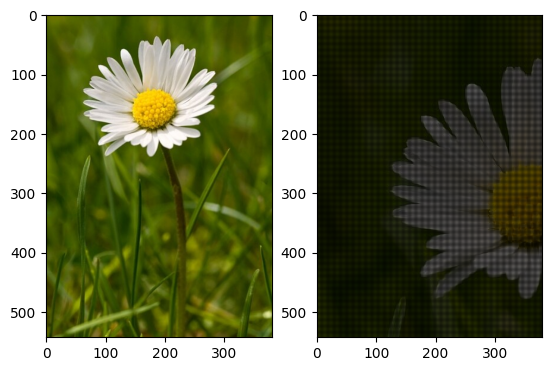

In [ ]:
img_ = transform_image(img, 0, 0, 2, 2)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_)
plt.show()

## Analysis
- As can be observed, after applying the translation and scaling the image has been shifted to one side of the resulatant and after scaling some pixels are left empty, because of lack of interpolation.

## Task 3

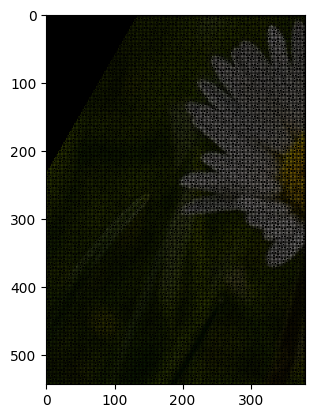

In [ ]:
img = cv2.imread("/content/Daisy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rotated_img = rotate_image_1(img, 30)
transformed_img = transform_image(rotated_img, 0, 0, 2, 2)
plt.imshow(transformed_img)